# **Project : Credit Card Fraud Detection**

##### **Project Type**    - Supervised Learning
##### **Contribution**    - Team
##### **Team Member 1 -Manasvi Save**
##### **Team Member 2 -Sameer Rudani**


# **Project Summary -**

Credit card fraud detection involves the use of various technologies and techniques to identify and prevent unauthorized or fraudulent transactions on credit cards.To examine transaction data and identify odd or suspicious activity, common techniques include machine learning algorithms, anomaly detection, and pattern recognition. To improve credit card transaction security and shield cardholders and financial institutions from fraudulent activity, real-time monitoring, behavioural analysis, and authentication methods are also used. To guarantee a smooth and safe payment experience for authorised users, the objective is to promptly detect and halt fraudulent transactions while reducing false positives.

# **GitHub Link -**

https://github.com/msave121/Credit-Card-Fraud-Detection

# **Problem Statement**


The aim of the project is to predict fraudulent credit card transactions using machine learning models. This is crucial from the bank’s as well as customer’s perspective. The banks cannot afford to lose their customers’ money to fraudsters. Every fraud is a loss to the bank as the bank is responsible for the fraud transactions.

Dataset:
The dataset includes instances of both authentic and fraudulent credit card transactions from the past. Numerous characteristics, including the transaction amount, timestamp, location, and other pertinent data, define each transaction. To differentiate between authentic and fraudulent transactions, the dataset is labelled.

Challenges:

Class Imbalance:
When fraudulent transactions are more uncommon than legitimate ones, there is an imbalance in the classes. To make sure the model doesn't start to favour the majority class, it is imperative to address this imbalance.

Dynamic Nature of Fraud:
Fraud patterns evolve over time, requiring the model to adapt and learn new patterns continuously. The solution should be dynamic and capable of updating its knowledge to detect emerging fraud tactics.

Real-time Processing:
To quickly identify possible fraud and stop illegal transactions, the model must function in real-time or almost in real-time.

# ***Let's Begin !***

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Reading Dataset

In [3]:
data=pd.read_csv('/content/drive/MyDrive/creditcard.csv')

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# **Exploratory Data Analysis**

### Null Values

In [5]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### ***There are no null values in the dataset.***

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Descriptive Statistics

In [7]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
data.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344


In [9]:
data.shape

(284807, 31)

#### ***There are 284807 rows and 31 columns.***

In [10]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

# Fraud cases and genuine cases

In [11]:
fraud_cases=len(data[data['Class']==1])

In [12]:
print(' Number of Fraud Cases:',fraud_cases)

 Number of Fraud Cases: 492


In [13]:
non_fraud_cases=len(data[data['Class']==0])

In [14]:
print('Number of Non Fraud Cases:',non_fraud_cases)

Number of Non Fraud Cases: 284315


In [15]:
fraud=data[data['Class']==1]

In [16]:
genuine=data[data['Class']==0]

In [17]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [18]:
genuine.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

# **Data Visualization**

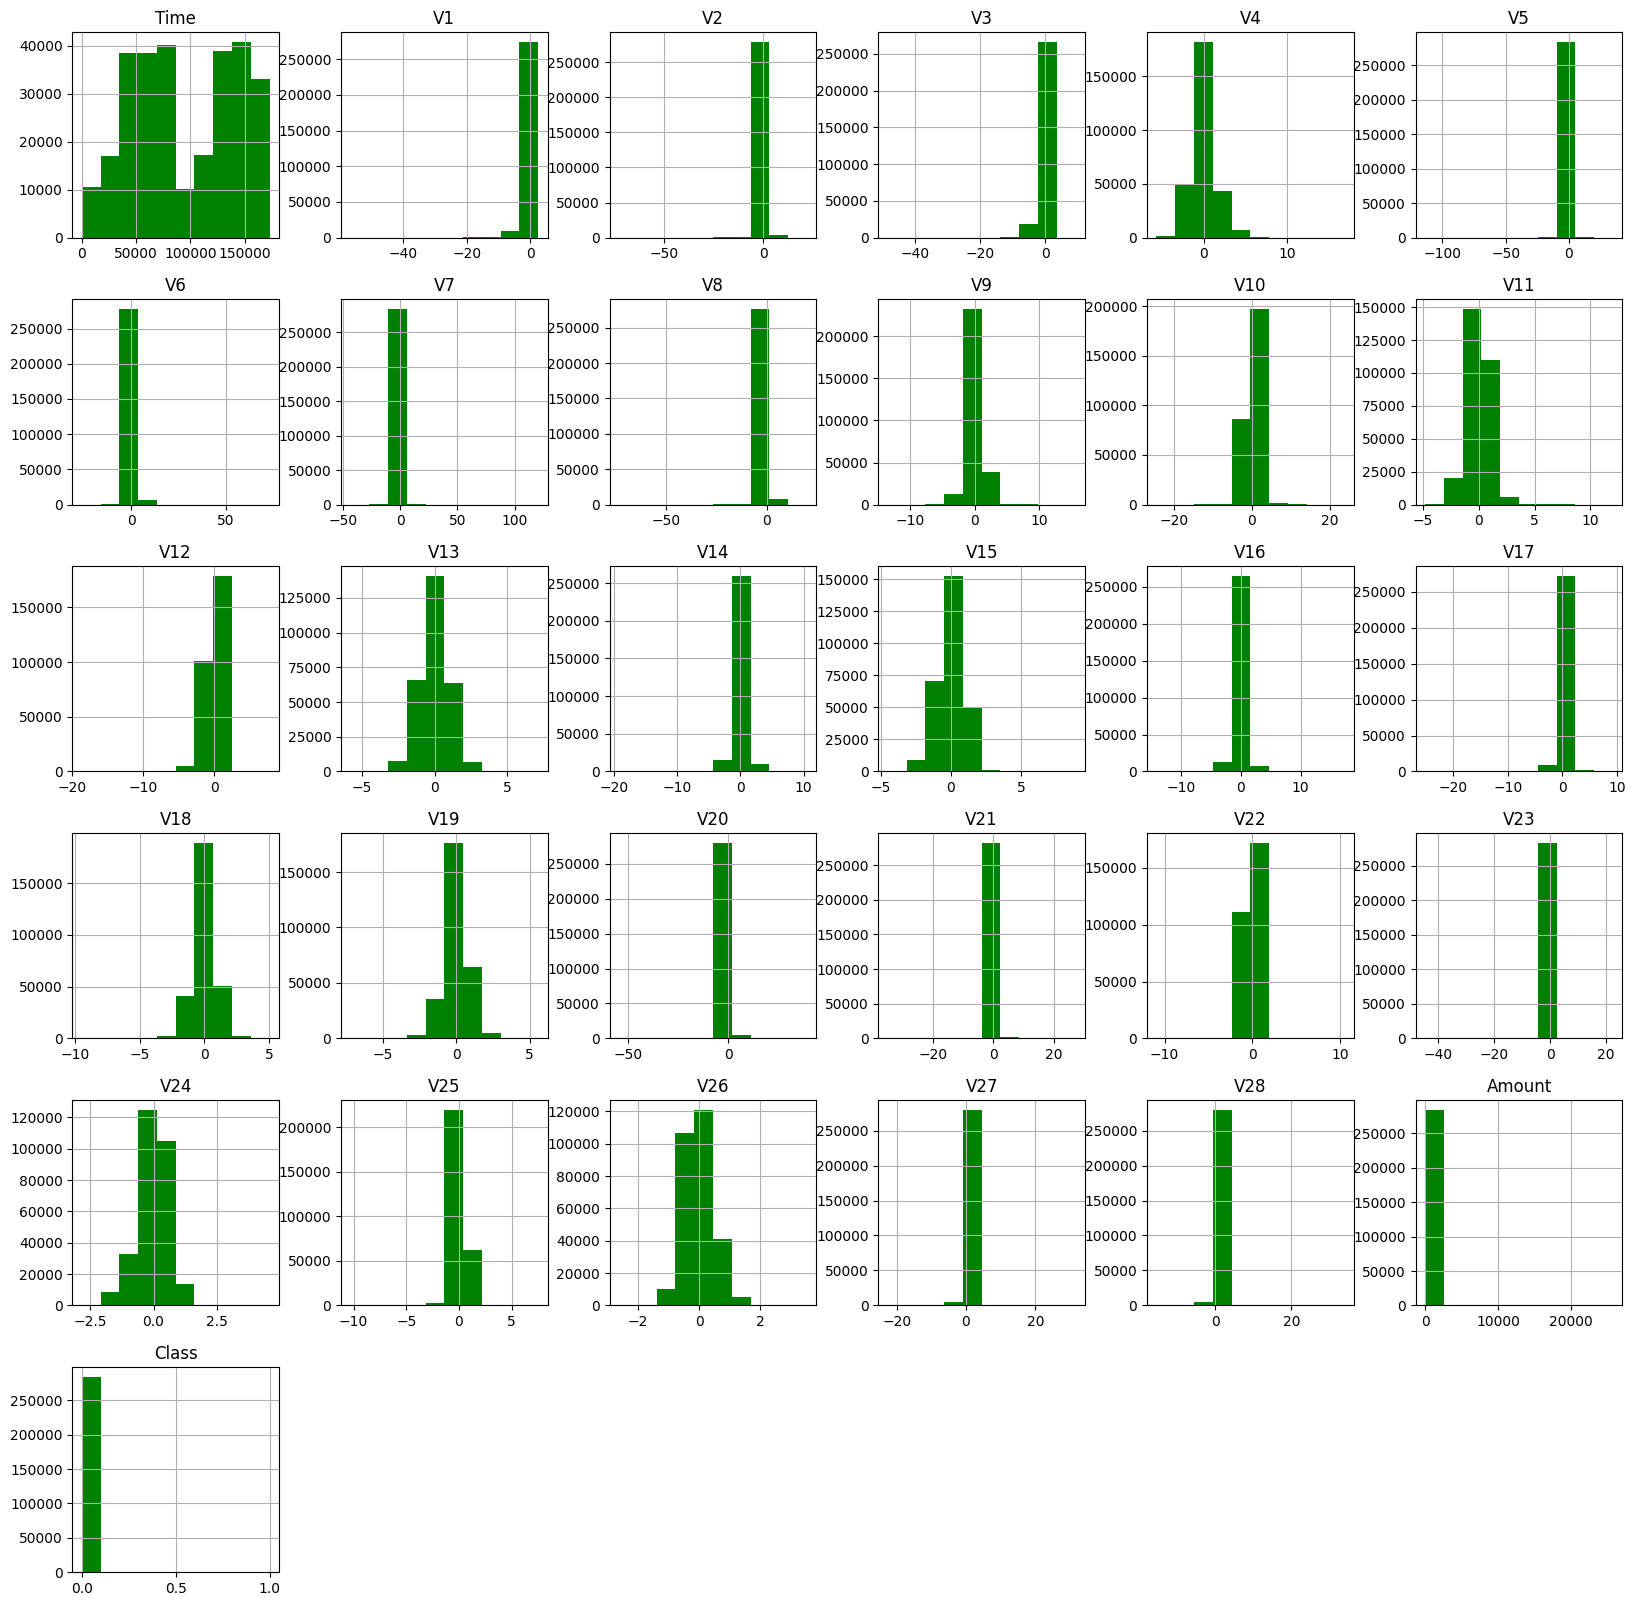

In [19]:
data.hist(figsize=(20,20),color='green')
plt.show()

### **Calculate Time of transaction vs Amount by class**

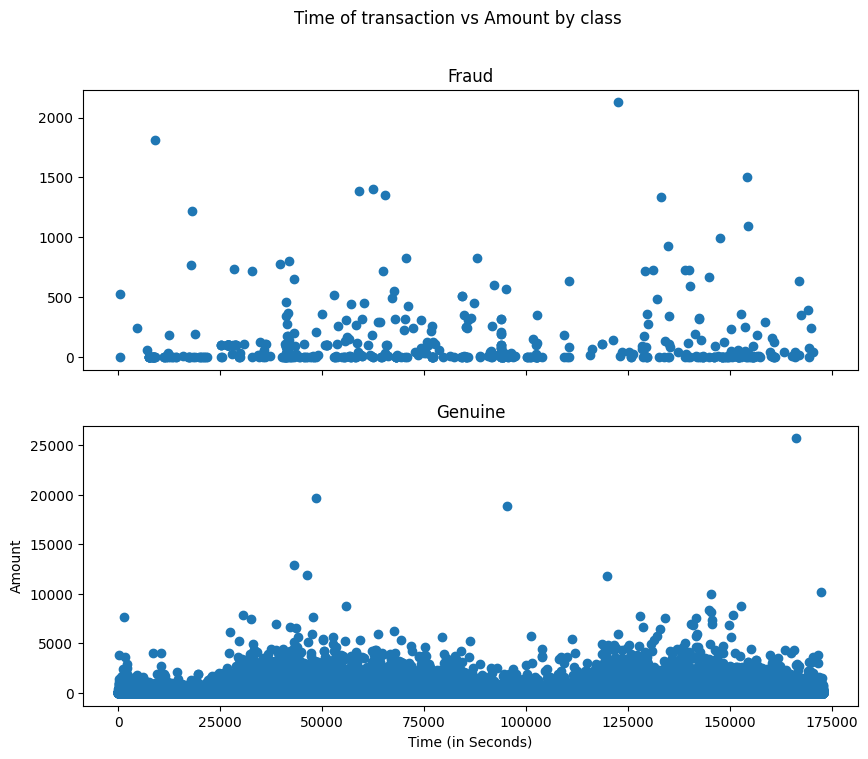

In [20]:
rcParams['figure.figsize'] = 10, 8
f,(ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(genuine.Time, genuine.Amount)
ax2.set_title('Genuine')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

### **Correlation**

<Axes: >

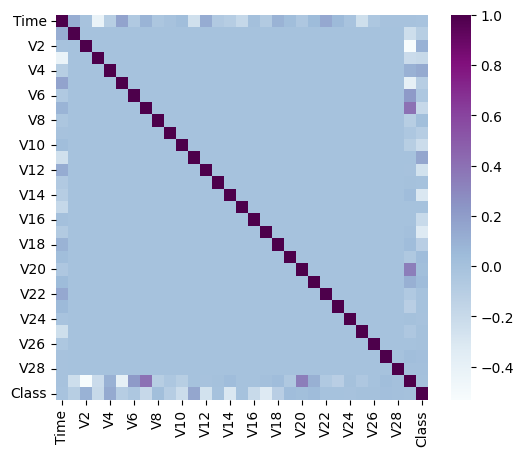

In [21]:
plt.figure(figsize=(6,5))
corr=data.corr()
sns.heatmap(corr,cmap='BuPu')

### **Box Plot**

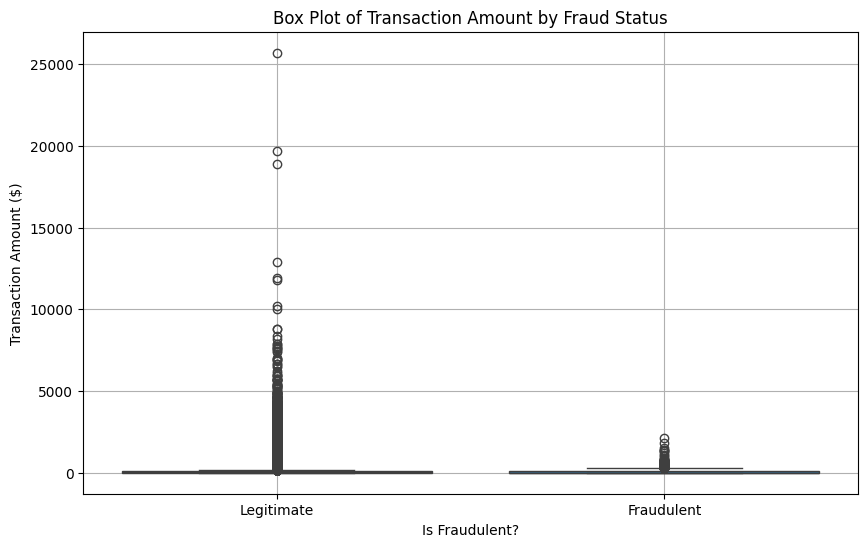

In [22]:
fraudulent_transactions = data[data['Class'] == 1]
legitimate_transactions = data[data['Class'] == 0]

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=data)
plt.title('Box Plot of Transaction Amount by Fraud Status')
plt.xlabel('Is Fraudulent?')
plt.ylabel('Transaction Amount ($)')
plt.xticks([0, 1], ['Legitimate', 'Fraudulent'])
plt.grid(True)
plt.show()

### **Scatter Plot**

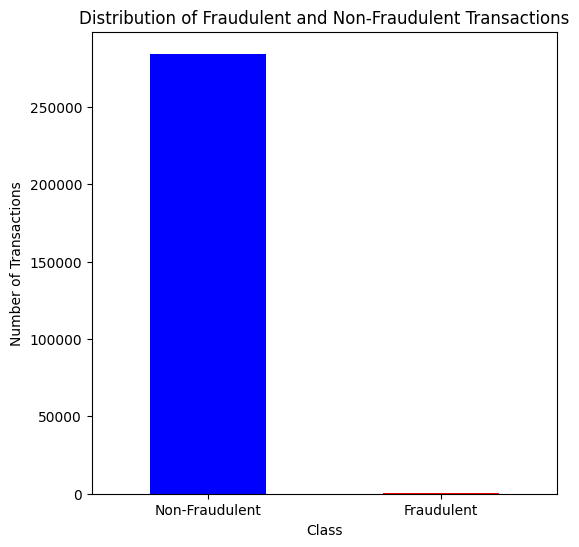

In [23]:
# Count the occurrences of each class
class_counts = data['Class'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(6, 6))
class_counts.plot(kind='bar', color=['blue', 'red'])  # Blue for non-fraudulent (0) and red for fraudulent (1)
plt.title('Distribution of Fraudulent and Non-Fraudulent Transactions')
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'], rotation=0)
plt.show()

### **Pair Plots**

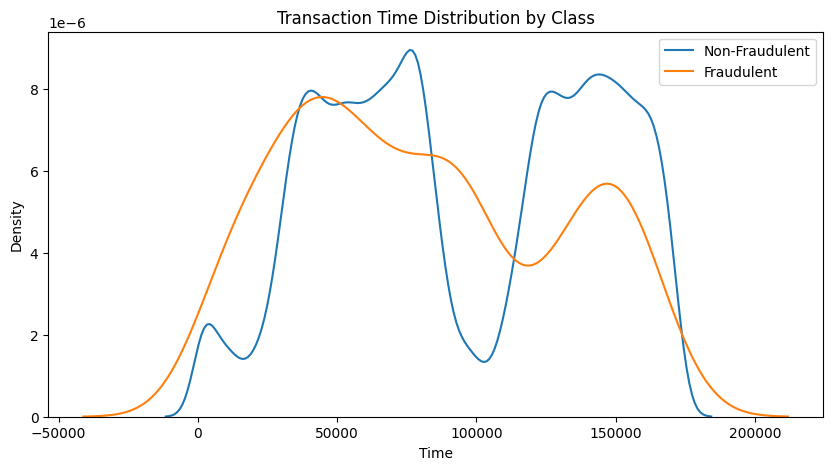

In [24]:
# Transaction time distribution by class
plt.figure(figsize=(10, 5))
sns.distplot(data[data['Class'] == 0]['Time'], label='Non-Fraudulent', hist=False)
sns.distplot(data[data['Class'] == 1]['Time'], label='Fraudulent', hist=False)
plt.title('Transaction Time Distribution by Class')
plt.xlabel('Time')
plt.ylabel('Density')
plt.legend()
plt.show()


# **Model with optimal hyperparameters**

Hyperparameters are settings that you tune to optimize the performance of your model.

We see that the train score almost touches to 1. Among the hyperparameters, we can choose the best parameters as learning_rate : 0.2 and subsample: 0.3

In [39]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [40]:
# Importing XGBoost
from xgboost import XGBClassifier

params = {'learning_rate': 0.2,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_imbalance_model = XGBClassifier(params = params)
xgb_imbalance_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

### **Prediction on the train set**

In [41]:
# Predictions on the train set
y_train_pred = xgb_imbalance_model.predict(X_train)

In [42]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[227451      0]
 [     0    394]]


In [43]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [44]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 1.0


In [45]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



In [46]:
# Predicted probability
y_train_pred_prob_imbalance_xgb = xgb_imbalance_model.predict_proba(X_train)[:,1]

In [47]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_prob_imbalance_xgb)
auc

1.0

### **ROC on the train set**

In [49]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

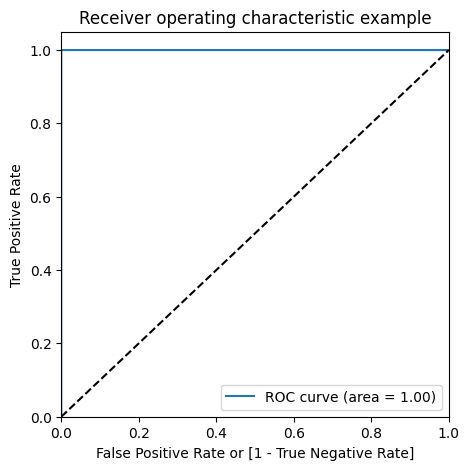

In [50]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_prob_imbalance_xgb)

### **Prediction on the test set**

In [51]:
# Predictions on the test set
y_test_pred = xgb_imbalance_model.predict(X_test)

In [52]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56861     3]
 [   22    76]]


In [53]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [54]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9995611109160493
Sensitivity:- 0.7755102040816326
Specificity:- 0.9999472425436128
F1-Score:- 0.8587570621468926


In [55]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [56]:
# Predicted probability
y_test_pred_prob = xgb_imbalance_model.predict_proba(X_test)[:,1]

In [57]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_prob)
auc

0.9811164195560047

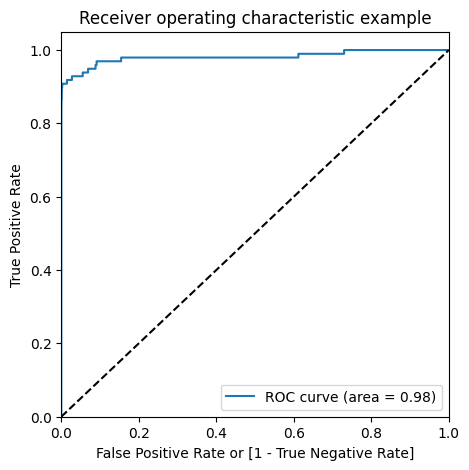

In [58]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_prob)

### **Model summary**

#### **Train set**

#####Accuracy = 0.99
#####Sensitivity = 0.85
#####Specificity = 0.99
#####ROC-AUC = 0.99
#####F1-Score = 0.90
#### **Test set**
#####Accuracy = 0.99
#####Sensitivity = 0.75
#####Specificity = 0.99
#####ROC-AUC = 0.98
#####F-Score = 0.79
Overall, the model is performing well in the test set, from what it had learnt from the train set.

In this code:

1. We load the credit card fraud detection dataset.
2. Separate the features (X) and target variable (y).
3. Split the data into training and testing sets.
4. Handle class imbalance using SMOTE (Synthetic Minority Over-sampling Technique).
5. Define a parameter grid for hyperparameter tuning.
6. Perform grid search with cross-validation to find the best hyperparameters.
7. Train the final model using the best hyperparameters.
8. Make predictions on the test set and evaluate the model's performance.

# **Machine Learning Algorithms**

# **1. Random Forest Classifier**

1. The dataset is loaded and explored to understand its structure and characteristics.
2. Data preprocessing is performed, including standardization of the 'Amount' feature.
3. The data is split into training and testing sets.
4. A Random Forest Classifier model is trained on the training data.
5. The model is evaluated using the testing data, and metrics like the confusion matrix and classification report are generated.
6. Finally, the confusion matrix is visualized to better understand the model's performance.

In [25]:
# Data exploration
print(data.head())
print(data.info())
print(data.describe())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [26]:
# Check for missing values
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [27]:
# Check the distribution of classes
print(data['Class'].value_counts())

0    284315
1       492
Name: Class, dtype: int64


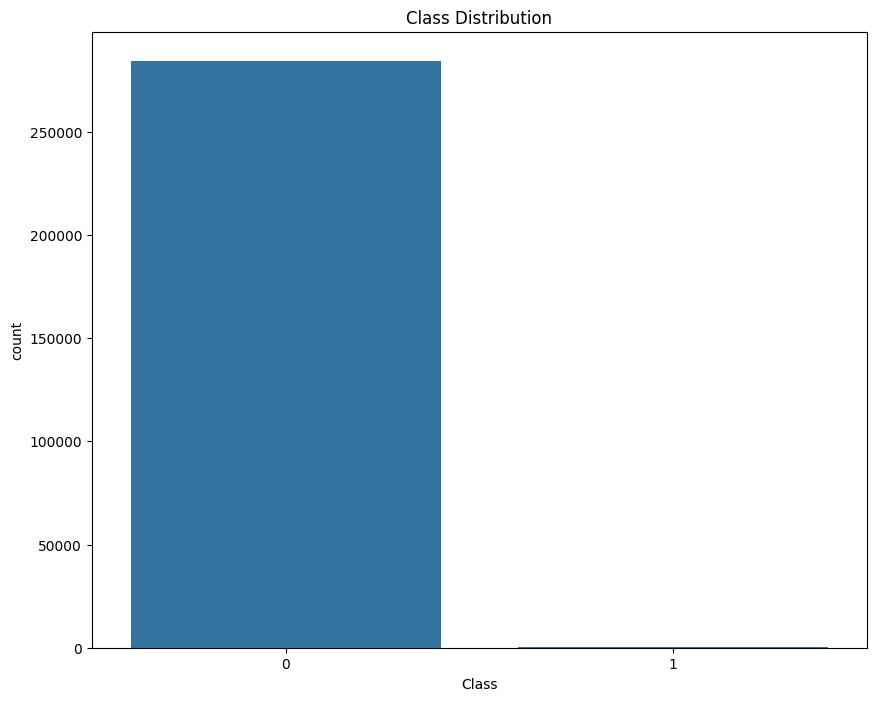

In [28]:
# Visualize the distribution of classes
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.show()

In [29]:
# Data preprocessing
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))

In [30]:
# Splitting the data into train and test sets
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Feature Engineering**

Feature engineering is crucial for credit card fraud detection as it helps in creating new informative features or transforming existing ones to improve the performance of machine learning models.

In [31]:
X_train['Amount_to_mean'] = X_train['Amount'] / X_train['Amount'].mean()
X_train['Amount_to_std'] = X_train['Amount'] / X_train['Amount'].std()

X_test['Amount_to_mean'] = X_test['Amount'] / X_test['Amount'].mean()
X_test['Amount_to_std'] = X_test['Amount'] / X_test['Amount'].std()

In [32]:
# Model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[56861     3]
 [   22    76]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



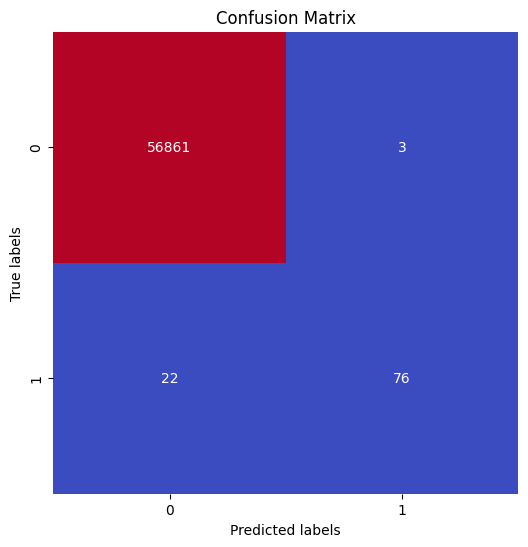

In [33]:
# Visualize confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, cmap='coolwarm', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()




# **2. Decision Tree**

In [63]:
import numpy as np
!pip install scikit-learn
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [59]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [60]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

In [61]:
# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': range(5, 16, 5),  # Extend the range to include 15
    'min_samples_leaf': range(50, 151, 50),  # Extend the range to include 150
    'min_samples_split': range(50, 151, 50)  # Extend the range to include 150
}

# Initialize DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()

# Initialize GridSearchCV with the modified parameters
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=2)

# Fit the GridSearchCV instance to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END max_depth=5, min_samples_leaf=50, min_samples_split=50; total time=  16.1s
[CV] END max_depth=5, min_samples_leaf=50, min_samples_split=50; total time=   5.4s
[CV] END max_depth=5, min_samples_leaf=50, min_samples_split=50; total time=   6.2s
[CV] END max_depth=5, min_samples_leaf=50, min_samples_split=50; total time=   5.5s
[CV] END max_depth=5, min_samples_leaf=50, min_samples_split=50; total time=   5.6s
[CV] END max_depth=5, min_samples_leaf=50, min_samples_split=100; total time=   8.3s
[CV] END max_depth=5, min_samples_leaf=50, min_samples_split=100; total time=   7.0s
[CV] END max_depth=5, min_samples_leaf=50, min_samples_split=100; total time=   5.7s
[CV] END max_depth=5, min_samples_leaf=50, min_samples_split=100; total time=   5.4s
[CV] END max_depth=5, min_samples_leaf=50, min_samples_split=100; total time=   6.3s
[CV] END max_depth=5, min_samples_leaf=50, min_samples_split=150; total time=   5.4s
[CV] END

In [66]:
# cv results
model_cv_results = pd.DataFrame(grid_search.cv_results_)
model_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,7.720827,4.158674,0.024245,0.006866,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.929266,0.914347,0.926504,0.930140,0.917481,0.923548,0.006424,25
1,6.519254,1.023159,0.021927,0.004050,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.929266,0.901678,0.926498,0.930124,0.917481,0.921009,0.010654,27
2,5.765086,0.407855,0.017704,0.003029,5,50,150,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.929261,0.914238,0.926500,0.930064,0.917402,0.923493,0.006453,26
3,6.960857,1.432723,0.026901,0.012448,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.922486,0.914893,0.904565,0.930047,0.946906,0.923779,0.014311,23
4,6.318732,1.005440,0.020020,0.003807,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.922486,0.914893,0.904565,0.930047,0.946906,0.923779,0.014311,23
5,5.776948,0.487210,0.016796,0.000494,5,100,150,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.922492,0.914893,0.904565,0.930047,0.946906,0.923780,0.014310,22
6,5.988400,0.648344,0.018293,0.003311,5,150,50,"{'max_depth': 5, 'min_samples_leaf': 150, 'min...",0.946165,0.925350,0.926546,0.964804,0.947490,0.942071,0.014721,8
7,5.901677,0.620071,0.019880,0.003558,5,150,100,"{'max_depth': 5, 'min_samples_leaf': 150, 'min...",0.946165,0.925350,0.926546,0.964804,0.947479,0.942069,0.014720,9
8,7.439058,1.215877,0.026438,0.011155,5,150,150,"{'max_depth': 5, 'min_samples_leaf': 150, 'min...",0.946165,0.925350,0.926546,0.964804,0.947479,0.942069,0.014720,9
9,15.222645,3.024413,0.023928,0.004445,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.946331,0.888444,0.925022,0.972068,0.935066,0.933386,0.027410,15


In [67]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9517117606618181
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=150)


In [68]:
# Model with optimal hyperparameters
dt_imbalance_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=5,
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_imbalance_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=100,
                       random_state=100)

#### **Prediction on the train set**

In [71]:
# Predictions on the train set
y_train_pred = dt_imbalance_model.predict(X_train)

In [72]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train)
print(confusion)

[[227451      0]
 [     0    394]]


In [73]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [74]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.999100265531392
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 0.7233468286099864


In [75]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.77      0.68      0.72       394

    accuracy                           1.00    227845
   macro avg       0.89      0.84      0.86    227845
weighted avg       1.00      1.00      1.00    227845



In [76]:
# Predicted probability
y_train_pred_prob = dt_imbalance_model.predict_proba(X_train)[:,1]

In [77]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_prob)
auc

0.9486790003545584

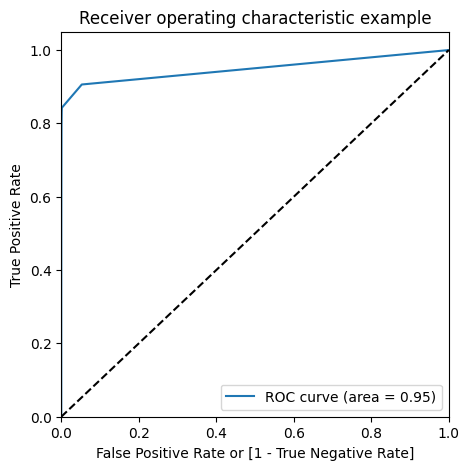

In [78]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_prob)

#### **Prediction on the test set**

In [79]:
# Predictions on the test set
y_test_pred = dt_imbalance_model.predict(X_test)

In [80]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56839    25]
 [   29    69]]


In [81]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [82]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9990519995786665
Sensitivity:- 0.7040816326530612
Specificity:- 0.9995603545301069
F1-Score:- 0.7233468286099864


In [83]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.70      0.72        98

    accuracy                           1.00     56962
   macro avg       0.87      0.85      0.86     56962
weighted avg       1.00      1.00      1.00     56962



In [84]:
# Predicted probability
y_test_pred_prob = dt_imbalance_model.predict_proba(X_test)[:,1]

In [85]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_prob)
auc

0.9550532491415248

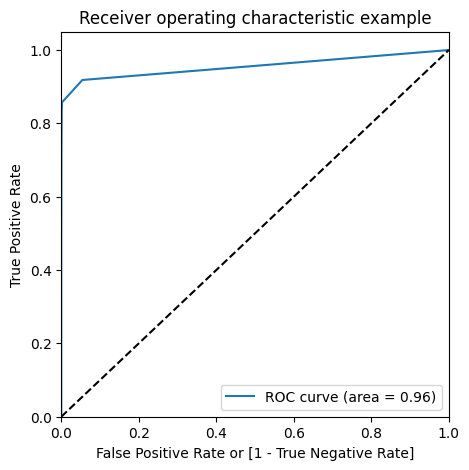

In [86]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_prob)

### **Model summary**

####**Train set**

Accuracy = 0.99

Sensitivity = 1.0

Specificity = 1.0

F1-Score = 0.75

ROC-AUC = 0.95

####**Test set**

Accuracy = 0.99

Sensitivity = 0.58

Specificity = 0.99

F-1 Score = 0.75

ROC-AUC = 0.92




# **3. LogisticRegression**


### **Under Sampling**
### Builed a sample dataset containing similar distribution of normal transaction and fraudlend transaction

Number of Fraudlent Transaction --> 492

In [87]:
genuine_sample = genuine.sample(n = 492)

### **Concatinating two DataFrame**

In [88]:
new_data = pd.concat([genuine_sample,fraud],axis=0)

In [89]:
new_data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
120703,75932.0,-0.384413,1.088955,1.270111,0.011912,0.228648,-0.516766,0.632016,0.061869,-0.409132,...,-0.235833,-0.568843,0.011121,0.024987,-0.231414,0.101369,0.262985,0.095007,1.79,0
108462,70911.0,1.247831,0.550352,0.142131,2.101532,0.692648,0.761612,0.021950,0.095474,-0.693431,...,-0.150311,-0.408340,-0.107565,-1.333163,0.523687,0.018005,0.011453,0.008722,1.00,0
6172,7185.0,-1.927952,1.497151,0.517757,0.059585,-0.006310,-0.671009,0.074800,0.471042,1.326811,...,-0.594053,-0.866782,0.305381,-0.139360,0.046388,0.023100,0.085460,-0.395808,9.99,0
211214,138315.0,-0.513109,-1.136870,-0.483688,-2.775625,-0.471605,-1.311557,2.044349,-0.843967,-2.737679,...,0.210742,0.546335,0.371663,0.007953,0.300309,-0.098880,-0.192448,-0.064759,319.00,0
16259,27658.0,1.253223,0.201134,-0.197224,0.256062,0.412765,0.382340,-0.142646,0.176146,-0.099393,...,-0.289302,-0.845760,0.006507,-1.198754,0.257787,0.180296,-0.014064,0.004570,1.29,0


In [90]:
new_data.shape

(984, 31)

In [91]:
new_data["Class"].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [92]:
new_data.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93276.148374,-0.140909,-0.115968,-0.026016,0.039034,0.009123,0.039532,0.018743,0.042991,0.045637,...,0.010209,-0.005273,-0.044942,0.041014,-0.012917,0.006958,0.026919,0.007817,0.003592,102.841240
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


### **Selecting the data into Feature and Target**

In [93]:
X = new_data.drop(columns="Class", axis=1)
y = new_data["Class"]

In [94]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
120703,75932.0,-0.384413,1.088955,1.270111,0.011912,0.228648,-0.516766,0.632016,0.061869,-0.409132,...,0.084503,-0.235833,-0.568843,0.011121,0.024987,-0.231414,0.101369,0.262985,0.095007,1.79
108462,70911.0,1.247831,0.550352,0.142131,2.101532,0.692648,0.761612,0.021950,0.095474,-0.693431,...,-0.110249,-0.150311,-0.408340,-0.107565,-1.333163,0.523687,0.018005,0.011453,0.008722,1.00
6172,7185.0,-1.927952,1.497151,0.517757,0.059585,-0.006310,-0.671009,0.074800,0.471042,1.326811,...,0.114862,-0.594053,-0.866782,0.305381,-0.139360,0.046388,0.023100,0.085460,-0.395808,9.99
211214,138315.0,-0.513109,-1.136870,-0.483688,-2.775625,-0.471605,-1.311557,2.044349,-0.843967,-2.737679,...,0.293134,0.210742,0.546335,0.371663,0.007953,0.300309,-0.098880,-0.192448,-0.064759,319.00
16259,27658.0,1.253223,0.201134,-0.197224,0.256062,0.412765,0.382340,-0.142646,0.176146,-0.099393,...,-0.086323,-0.289302,-0.845760,0.006507,-1.198754,0.257787,0.180296,-0.014064,0.004570,1.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [95]:
y

120703    0
108462    0
6172      0
211214    0
16259     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

### **Spliting the data in training data and test data**

In [96]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.2,random_state=2)

In [97]:
print(X.shape,X_train.shape,X_test.shape)

(984, 30) (787, 30) (197, 30)


### **Model training**


In [98]:
model = LogisticRegression()

In [99]:
#Training the LogisticRegression model with training data
model.fit(X_train,y_train)

LogisticRegression()

### **Model Evaluation**
####**Accuracy score**

In [100]:
#Accuracy score on training data
X_train_prediction = model.predict(X_train)
accuracy_score_on_training_data = accuracy_score(y_train,X_train_prediction)
print("Accuracy score on training data: ",accuracy_score_on_training_data)

Accuracy score on training data:  0.9453621346886912


In [101]:
#Accuracy score on test data
X_test_prediction = model.predict(X_test)
accuracy_score_on_test_data = accuracy_score(y_test,X_test_prediction)
print("Accuracy score on test data: ",accuracy_score_on_test_data)

Accuracy score on test data:  0.9289340101522843


# **Conclusion**

We have tried several models till now with both balanced and imbalanced data. We have noticed most of the models have performed more or less well in terms of ROC score, Precision and Recall.

We should keep few points in mind to pick best model such as required infrastructure, resources or computational power to run the model or not. For the models such as Random forest, XGBoost we require heavy computational resources and eventually to build that infrastructure the cost of deploying the model increases. On the other hand the simpler model such as Logistic regression requires less computational resources, so the cost of building the model is less.

For credit card fraud detection, logistic regression, random forest and decision tree algorithms can be effective depending on the nature of the dataset and the specific requirements.

Because it is an easier model to understand, logistic regression is a good choice in situations where model transparency is essential.
When handling more complex fraud patterns, random forest is the recommended option due to its increased flexibility and robustness in handling datasets with non-linear relationships. Decision trees can perform well on credit card fraud detection tasks, especially when the data has clear decision boundaries and distinct patterns. However, they may not generalize well to unseen data if overfitting occurs.